# Feature Reduction using FA
We followed the assignment to generate artificial dataset and apply FA model to reduce the dimensionality of the observable data into various dimensions. We compare the AIC and BIC criteria to determine the best latent dimension. The result suggests when reduced dimensionality is equal to the dimensionality of the true underlying latent variable, both informatioin criteria reach their highest value.

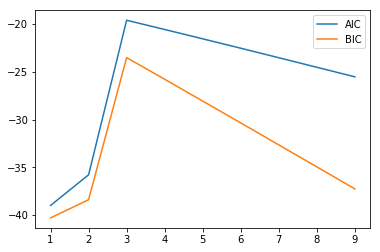

In [3]:
import numpy as np
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

np.random.seed(0)

N = 100 # number of observable x's
n = 10  # dim of observables x's
true_m = 3 # dim of true underlying latent variable Y
sigma_squared = 0.1 # Covariance of noise vector (n-dimensional)

# Set up parameters
mu_y = np.zeros(true_m)
covariance_y = np.eye(true_m)
mu_e = np.zeros(n)
covariance_e = np.eye(n) * sigma_squared
A = np.random.randn(n, true_m) * 10 

# Generate data
# sample y's from G(0, I) with dim = m
Y = np.random.multivariate_normal(mean=mu_y, cov=covariance_y, size=N)

# Sample noise e's from G(0, sigma^2I) with dim = n
E = np.random.multivariate_normal(mean=mu_e, cov=covariance_e, size=N)

# Generate observables x's from x = Ay + e
X = np.array([np.matmul(A, Y[i]) + E[i] for i in range(N)])


# Fit an FA model to reduce the X into latent variables of
# different dimensionality
AIC_result = []
BIC_result = []
# try dim = {1,2,...,9} for latent variable y's using FA model,
# assuming all we have are the observables x's but nothing about y's
M = 9   
for m in range(1, M+1):
    # Two-stage model selection process for BIC and AIC
    # Stage-1: Run EM algorithm on dataset X
    transformer = FactorAnalysis(n_components=m, random_state=0)
    transformer.fit(X)
    log_likelihood = transformer.score(X)

    J_AIC = log_likelihood - m
    J_BIC = log_likelihood - np.log(N) * m / 2
    
    AIC_result.append(J_AIC)
    BIC_result.append(J_BIC)

# Plot the results
plt.plot(np.arange(1,M+1), AIC_result)
plt.plot(np.arange(1,M+1), BIC_result)
plt.legend(['AIC', 'BIC'])